In [25]:
!pip uninstall scikit-learn scikit-survival
#!pip show scikit-learn
!pip install scikit-learn scikit-survival lifelines
#!pip install scikit-learn==1.1.0
#!pip install scikit-survival==0.18.0
#! pip install eli5==0.13.0

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.5.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.5.2
Found existing installation: scikit-survival 0.23.1
Uninstalling scikit-survival-0.23.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_survival-0.23.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/sksurv/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-survival-0.23.1
Y
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scikit_survival-0.23.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (48 kB)
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.

In [10]:
### import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Lire le fichier en sautant la première ligne
df = pd.read_excel("/content/drive/MyDrive/GastricCancerData.xlsx", skiprows=1)
# Afficher les premières lignes du dataframe
df.head()

In [12]:
df = pd.read_excel("D:/UADB/MEMOIRE/Data/GastricCancerData.xlsx")

In [13]:
#affichage des dimensions
df.shape

(337, 18)

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Identifier les colonnes catégoriques
CatCols = df.select_dtypes(include=['object']).columns
# Encodage des variables catégoriques
#Label Encoding
label_encoder = LabelEncoder()
for col in CatCols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df.head()

,AGE,SEXE,Cardiopathie,Ulceregastrique,Douleurepigastrique,Ulcero-bourgeonnant,Constipation,Denitrution,Tabac,Mucineux,Tubuleux,Infiltrant,Stenosant,Metastases,Adenopathie,Traitement,Tempsdesuivi (Mois),Deces
0,65,0,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1
1,34,0,0,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1
2,55,1,0,0,1,0,1,0,1,1,0,1,0,1,1,1,1,1
3,60,0,1,1,1,0,1,0,1,1,1,1,0,1,0,1,2,0
4,65,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,2,1



## **I.Random Survival Forest**


In [ ]:
#!pip install --upgrade scikit-survival
!pip install --upgrade scikit-learn

In [31]:
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

**Données employées**  
Les variables cliniques et tumorales retenues pour l'analyse du risque de décès chez les patients atteints d'un cancer de l'estomac ont été sélectionnées selon leur pertinence statistique dans le modèle de Cox et leur contribution explicative mesurée par les valeurs SHAP. Parmi ces variables figuraient :**l'âge des patients**, la présence de **comorbidités (cardiopathies)**, des **symptômes cliniques** (douleur épigastrique, ulcère gastrique, lésion ulcéro-bourgeonnante), des **facteurs liés au mode de vie** (tabagisme, dénutrition), ainsi que des **caractéristiques tumorales** spécifiques (forme mucineuse, infiltration, sténose, métastases et adénopathies). Ces critères ont été retenus car ils ont systématiquement démontré, à travers le modèle de Cox et leurs valeurs SHAP positives, une influence significative sur la réduction de la survie. La robustesse de ces variables, validée à la fois par une approche statistique classique et par une analyse d'interprétabilité moderne (SHAP), fournit une base solide pour les explorations ultérieures.
Dans ce chapitres, nous étendrons cette analyse à des approches de *machine learning*, afin de comparer les performances prédictives et les insights cliniques entre méthodes traditionnelles et algorithmes avancés.  

In [ ]:
# Lire le fichier en sautant la première ligne
df = pd.read_excel("/content/drive/MyDrive/GastricCancerData.xlsx", skiprows=1)
# Afficher les premières lignes du dataframe
df.head()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Identifier les colonnes catégoriques
CatCols = df.select_dtypes(include=['object']).columns
# Encodage des variables catégoriques
#Label Encoding
label_encoder = LabelEncoder()
for col in CatCols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [17]:
# Effacer les variables non pertinantes
clean=['SEXE','Tubuleux','Traitement','Constipation']
df=df.drop(columns=clean,axis=1)

In [18]:
n_censored = df.shape[0] - df["Deces"].sum()
print(f"{n_censored / df.shape[0] * 100:.1f}% des enregistrements sont censurés")

33.8% des enregistrements sont censurés


In [32]:
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import train_test_split
from sksurv.metrics import concordance_index_censored

# Assurez-vous que y est bien structuré
y = np.array(list(zip(df["Deces"].astype(bool), df["Tempsdesuivi (Mois)"])),
             dtype=[("event", "?"), ("time", "<f8")])

# Séparer les variables explicatives et la cible
X = df.drop(["Deces", "Tempsdesuivi (Mois)"], axis=1)

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a Random Surival Forest model with all metabolites
rsf = RandomSurvivalForest(random_state=42)
rsf.fit(X_train,y_train)

# using all metabolites as feature,and get a concordance index of 0.660458 in testing data
print('training data c-index: %f' % rsf.score(X_train,y_train))
print('testing data c-index: %f' % rsf.score(X_test,y_test))

C:\Users\Sefdine\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


AttributeError: 'RandomSurvivalForest' object has no attribute 'criterion'

In [9]:
#!pip install shap

PermutationExplainer explainer: 270it [03:04,  1.40it/s]                                                               


Impact global des variables :

| Variable            | Valeur Moyenne   | SHAP   |
|:--------------------|:-----------------|:-------|
| Infiltrant          | 0.52             | 5.89   |
| Tabac               | 0.54             | 5.59   |
| Adenopathie         | 0.41             | 5.55   |
| Stenosant           | 0.46             | 3.79   |
| Metastases          | 0.43             | 3.71   |
| Ulceregastrique     | 0.38             | 1.68   |
| Ulcero-bourgeonnant | 0.34             | 1.68   |
| Cardiopathie        | 0.32             | 1.61   |
| Denitrution         | 0.34             | 1.04   |
| AGE                 | 52.14            | 0.61   |
| Mucineux            | 0.65             | 0.52   |
| Douleurepigastrique | 0.87             | 0.18   |


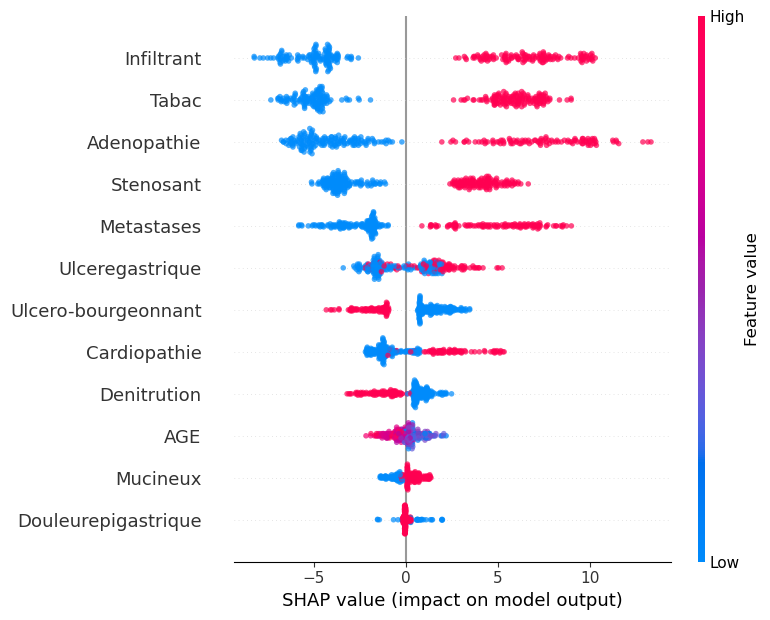

In [11]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored


# Sélection des variables pour l'analyse SHAP
selected_vars = ['AGE', 'Cardiopathie', 'Ulceregastrique', 'Douleurepigastrique',
                 'Ulcero-bourgeonnant', 'Denitrution', 'Tabac', 'Mucineux',
                 'Infiltrant', 'Stenosant', 'Metastases', 'Adenopathie']

# Utilisation de SHAP PermutationExplainer
explainer = shap.PermutationExplainer(rsf.predict, X_train[selected_vars])
shap_values = explainer(X_train[selected_vars])

# Création du tableau global des valeurs SHAP
shap_global = pd.DataFrame({
    'Variable': selected_vars,
    'Valeur Moyenne': X[selected_vars].mean().round(2).values,
    'SHAP': np.abs(shap_values.values).mean(axis=0).round(2)  # Prendre la moyenne des valeurs absolues
}).sort_values('SHAP', ascending=False).reset_index(drop=True)

# Affichage stylisé du tableau
print("Impact global des variables :\n")
print(shap_global.to_markdown(index=False, numalign="left", stralign="left"))

# Graphique SHAP amélioré
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values.values,
    X_train[selected_vars],
    plot_type="dot",
    color=plt.get_cmap("coolwarm"),
    alpha=0.7
)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import brier_score
from sksurv.util import Surv

# Définition des temps d'évaluation
time_points = np.linspace(y_test["time"].min(), y_test["time"].max(), 100)

# Calcul du score de Brier
brier_scores = brier_score(y_train, y_test, rsf.predict_survival_function(X_test), time_points)

# Affichage du score moyen
print(f"Score de Brier moyen : {np.mean(brier_scores[1]):.4f}")

# 📊 Tracer l'évolution du score de Brier
plt.figure(figsize=(10, 6))
plt.plot(time_points, brier_scores[1], label="Score de Brier", color='b', lw=2)
plt.xlabel("Temps")
plt.ylabel("Score de Brier")
plt.title("Évolution du Score de Brier au fil du temps")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


TypeError: float() argument must be a string or a real number, not 'StepFunction'

## **Optimisation des hyperparamètres**  
Pour maximiser la performance prédictive des modèles *Random Survival Forest* et *Gradient Boosting Survival*, une optimisation systématique des hyperparamètres a été réalisée à l'aide d'une **recherche exhaustive par grille (Grid Search)** couplée à une **validation croisée sur 5 plis**. Les hyperparamètres testés incluaient des éléments clés comme le nombre d'arbres (*n_estimators* : 50, 100, 200), la profondeur maximale des arbres (*max_depth* : 3, 5, 10), et des critères de division (*min_samples_split*, *min_samples_leaf*). Pour le *Random Survival Forest*, l'impact du nombre maximal de fonctionnalités (*max_features*) a également été exploré, tandis que le *Gradient Boosting* a intégré une analyse du taux d'apprentissage (*learning_rate* : 0.01, 0.1, 0.2). La sélection finale des combinaisons optimales s'est basée sur l'**indice de concordance** (*C-index*), une métrique centrale en analyse de survie pour évaluer la cohérence entre les risques prédits et les temps observés. `Cette approche rigoureuse a permis d'identifier les configurations les plus robustes pour chaque modèle, garantissant à la fois la stabilité des prédictions et la prévention du surajustement. Les résultats détaillés de cette optimisation serviront de base pour la comparaison des performances avec les modèles statistiques classiques dans les sections suivantes.`

**Données employées**  
Pour optimiser les performances des modèles *Random Survival Forest* et *Gradient Boosting Survival Tree*, une recherche systématique des hyperparamètres a été réalisée via une approche de *Grid Search* avec validation croisée (*GridSearchCV*). Pour chaque modèle, une grille d'hyperparamètres clés a été définie :  
- **Random Survival Forest** : nombre d'arbres (`n_estimators` : 50, 100, 200), profondeur maximale (`max_depth` : 3, 5, 10), critères de division des nœuds (`min_samples_split`, `min_samples_leaf`) et nombre de variables par split (`max_features`).  
- **Gradient Boosting** : taux d'apprentissage (`learning_rate` : 0.01, 0.1, 0.2), nombre d'itérations (`n_estimators`), et paramètres de complexité de l’arbre (`max_depth`, `min_samples_split`, `min_samples_leaf`).  

La sélection a été guidée par l’indice de concordance (*C-index*), mesurant la capacité du modèle à prédire correctement l’ordre des événements (décès). Une validation croisée en *5 folds* a été appliquée pour chaque combinaison d’hyperparamètres, garantissant une évaluation robuste et évitant le surajustement. Les configurations optimales retenues ont été celles maximisant le *C-index* sur les données d’entraînement. Cette méthodologie rigoureuse a permis de comparer équitablement les deux approches et de garantir leur fiabilité pour les analyses de survie ultérieures.  

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
tab_params = {
    'random_survival_forest': {
        'model': RandomSurvivalForest(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ["sqrt", 0.5, 1.0]  # Utilisez 'sqrt' pour les forêts aléatoires
        }
    },
    'gradient_boosting_survival': {
        'model': GradientBoostingSurvivalAnalysis(random_state=42),
        'params': {
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    }
}

In [ ]:
from sklearn.model_selection import ParameterGrid
from sksurv.metrics import concordance_index_censored

def custom_grid_search_cv(model, param_grid, X_train, y_train, cv=5):
    best_score = -np.inf
    best_params = None
    for params in ParameterGrid(param_grid):
        model.set_params(**params)
        scores = []
        # Validation croisée manuelle
        for train_idx, val_idx in KFold(n_splits=cv).split(X_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]
            model.fit(X_tr, y_tr)
            ci = concordance_index_censored(y_val["event"], y_val["time"], model.predict(X_val))[0]
            scores.append(ci)
        mean_score = np.mean(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_params = params
    return best_params, best_score

In [ ]:
from sklearn.model_selection import KFold

results = []
for model_name, mp in tab_params.items():
    best_params, best_score = custom_grid_search_cv(mp['model'], mp['params'], X_train, y_train)
    results.append({
        'model': model_name,
        'best_score': best_score,
        'best_params': best_params
    })

results_df = pd.DataFrame(results)
results_df

Les résultats obtenus avec la méthode **RandomizedSearchCV** ont permis de trouver les meilleurs paramètres pour deux modèles de prédiction de survie : **Random Survival Forest** et **Gradient Boosting Survival Analysis**.  


Pour le **Random Survival Forest**, les paramètres sélectionnés indiquent que l'algorithme a utilisé **50 arbres**, chacun ayant une profondeur maximale de **10 niveaux**. À chaque division d’un arbre, **seulement 50 % des variables** ont été prises en compte, ce qui a aidé à éviter le surapprentissage. De plus, un minimum de **10 observations** était nécessaire pour qu'un nœud se divise, et chaque feuille contenait au moins **une observation**.  

Concernant le **Gradient Boosting Survival Analysis**, l’algorithme a utilisé **100 arbres** avec une profondeur maximale de **5 niveaux**. Le taux d'apprentissage a été fixé à **0.1**, ce qui signifie que le modèle s'est ajusté progressivement pour éviter d’apprendre trop vite et risquer de perdre en précision. Comme pour le premier modèle, il fallait **au moins une observation par feuille** et **10 observations pour qu’un nœud se divise**.  

Ces réglages ont permis d’optimiser la performance des modèles pour mieux prédire le temps de survie des individus en fonction des données disponibles.

In [ ]:
results_df.loc[0,"best_params"]

In [16]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance

# Séparer les variables explicatives et la cible
X = df.drop(["Deces", "Tempsdesuivi (Mois)"], axis=1)

# Assurez-vous que y est bien structuré
y = np.array(list(zip(df["Deces"].astype(bool), df["Tempsdesuivi (Mois)"])),
             dtype=[("event", "?"), ("time", "<f8")])

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a Random Surival Forest model with all metabolites
rsf = RandomSurvivalForest(n_estimators = 200,
                          min_samples_split = 2,
                          min_samples_leaf = 1,
                          max_features = 1.0,
                           max_depth = 10
                          )
rsf.fit(X_train,y_train)

# using all metabolites as feature,and get a concordance index of 0.660458 in testing data
print('training data c-index: %f' % rsf.score(X_train,y_train))
print('testing data c-index: %f' % rsf.score(X_test,y_test))


training data c-index: 0.932293
testing data c-index: 0.851625


In [17]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored, integrated_brier_score
from sklearn.model_selection import train_test_split

# Calcul des métriques
# Concordance Index
c_index = concordance_index_censored(
    y_test["event"], y_test["time"], rsf.predict(X_test)
)[0]

# Brier Score intégré
# Limiter les points temporels à l'intervalle de suivi des données de test (exclure les bords)
min_time = y_test["time"].min() + 1e-8  # Légèrement au-dessus du min
max_time = y_test["time"].max() - 1e-8  # Légèrement en-dessous du max
time_points = np.linspace(min_time, max_time, 100)

# Extraction des prédictions de survie
survival_predictions = rsf.predict_survival_function(X_test)

# Convertir les prédictions en tableau 2D (probabilités à chaque point de temps)
survival_probabilities = np.asarray(
    [[fn(t) for t in time_points] for fn in survival_predictions]
)

# Calcul du Brier score intégré
brier_score_value = integrated_brier_score(y_train, y_test, survival_probabilities, time_points)

# Création d'un tableau des métriques avec 2 décimales
metrics_table = pd.DataFrame({
    "Metric": ["Brier Score intégré", "C-Index"],
    "Value": [f"{brier_score_value:.2f}", f"{c_index:.2f}"]
})

print(metrics_table)

                Metric Value
0  Brier Score intégré  0.08
1              C-Index  0.85


In [18]:
# Calcul de l'importance des variables par permutation
from sklearn.inspection import permutation_importance

perm = permutation_importance(rsf, X_test, y_test, n_repeats=15, random_state=42)

# Affichage des résultats
import pandas as pd
feature_importance = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": perm.importances_mean}
).sort_values(by="Importance", ascending=False)

print(feature_importance)


                Feature  Importance
5           Denitrution    0.056615
11          Adenopathie    0.056082
10           Metastases    0.052406
8            Infiltrant    0.051501
6                 Tabac    0.038785
2       Ulceregastrique    0.025306
1          Cardiopathie    0.012911
4   Ulcero-bourgeonnant    0.010620
0                   AGE    0.008542
9             Stenosant    0.008258
7              Mucineux   -0.000107
3   Douleurepigastrique   -0.003285


In [20]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Calcul de l'importance des variables par permutation
perm = permutation_importance(rsf, X_test, y_test, n_repeats=15, random_state=42)

# Création du DataFrame avec les importances et l'écart-type
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Weight": perm.importances_mean,
    "std": perm.importances_std
})

# Trier par importance décroissante
feature_importances.sort_values(by="Weight", ascending=False, inplace=True)

# Affichage des résultats
print(feature_importances)


                Feature    Weight       std
5           Denitrution  0.056615  0.009005
11          Adenopathie  0.056082  0.028088
10           Metastases  0.052406  0.019262
8            Infiltrant  0.051501  0.017898
6                 Tabac  0.038785  0.017275
2       Ulceregastrique  0.025306  0.010141
1          Cardiopathie  0.012911  0.009756
4   Ulcero-bourgeonnant  0.010620  0.005837
0                   AGE  0.008542  0.005500
9             Stenosant  0.008258  0.005971
7              Mucineux -0.000107  0.002671
3   Douleurepigastrique -0.003285  0.007882


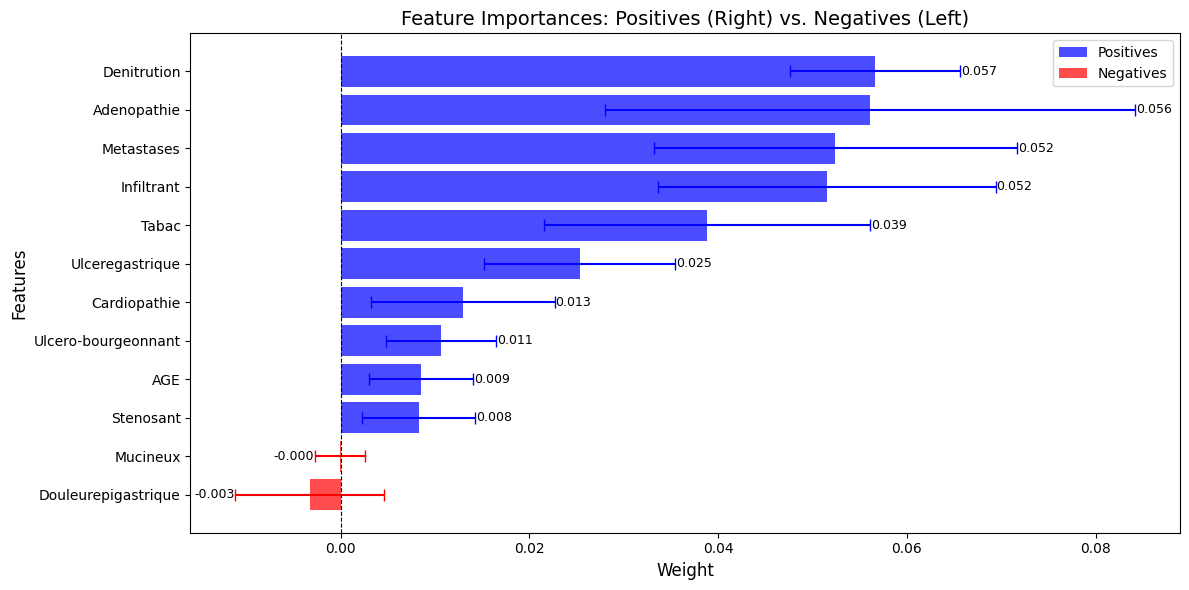

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Vérifier que feature_importances contient les bonnes colonnes
if "Feature" not in feature_importances.columns:
    raise ValueError("Le DataFrame feature_importances doit contenir une colonne 'Feature'.")

# Séparer les features positives et négatives
positive_features = feature_importances[feature_importances["Weight"] > 0]
negative_features = feature_importances[feature_importances["Weight"] <= 0]

# Créer la figure
plt.figure(figsize=(12, 6))

# Plot des features positives (barres bleues)
plt.barh(
    positive_features["Feature"],
    positive_features["Weight"],
    color="blue",
    alpha=0.7,
    label="Positives"
)
for i, (feature, weight, std) in enumerate(zip(positive_features["Feature"], positive_features["Weight"], positive_features["std"])):
    plt.errorbar(weight, i, xerr=std, fmt='none', ecolor="blue", capsize=4, capthick=1)
    plt.text(weight + std + 0.0001, i, f"{weight:.3f}", va="center", ha="left", color="black", fontsize=9)

# Plot des features négatives (barres rouges)
plt.barh(
    negative_features["Feature"],
    negative_features["Weight"],
    color="red",
    alpha=0.7,
    label="Negatives"
)
for i, (feature, weight, std) in enumerate(zip(negative_features["Feature"], negative_features["Weight"], negative_features["std"])):
    index_offset = i + len(positive_features)
    plt.errorbar(weight, index_offset, xerr=std, fmt='none', ecolor="red", capsize=4, capthick=1)
    plt.text(weight - std - 0.0001, index_offset, f"{weight:.3f}", va="center", ha="right", color="black", fontsize=9)

# Formatage du graphique
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
plt.title("Feature Importances: Positives (Right) vs. Negatives (Left)", fontsize=14)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


                Feature  Importance   Std Dev
11          Adenopathie    0.056313  0.032890
5           Denitrution    0.054582  0.005926
10           Metastases    0.049547  0.013534
8            Infiltrant    0.046324  0.011986
6                 Tabac    0.034417  0.016246
2       Ulceregastrique    0.023628  0.007567
4   Ulcero-bourgeonnant    0.011028  0.003674
1          Cardiopathie    0.010256  0.008637
0                   AGE    0.007619  0.005942
9             Stenosant    0.007539  0.006343
7              Mucineux    0.000959  0.002519
3   Douleurepigastrique   -0.002264  0.007348


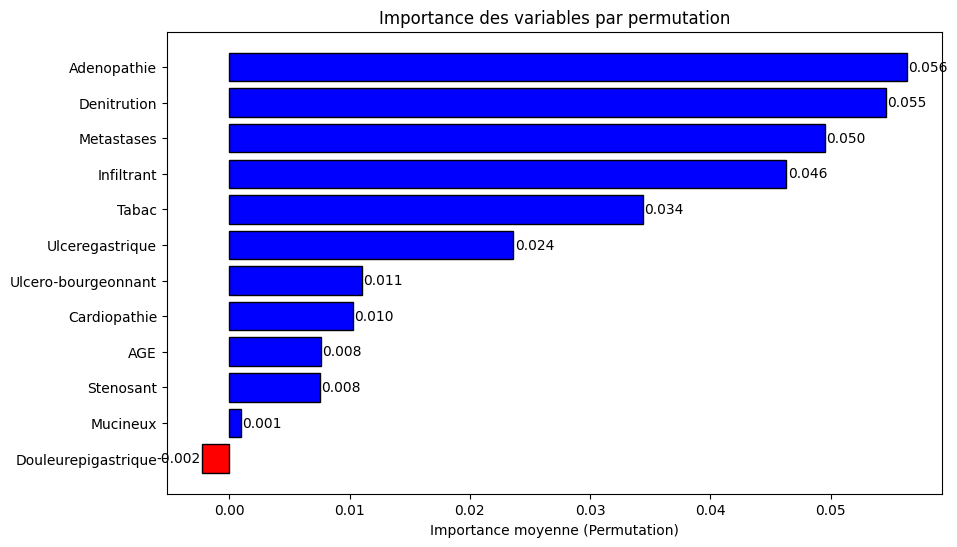

In [22]:
from sklearn.inspection import permutation_importance

# Appliquer l'importance par permutation
result = permutation_importance(
    rsf, X_test, y_test,
    n_repeats=10, random_state=42
)

# Créer un DataFrame pour organiser les résultats
importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean,
    "Std Dev": result.importances_std
}).sort_values(by="Importance", ascending=False)

print(importance_df)

# Préparer les couleurs : rouge pour les valeurs négatives, bleu pour les positives
colors = ["blue" if val > 0 else "red" for val in importance_df["Importance"]]

# Visualiser les résultats
plt.figure(figsize=(10, 6))
bars = plt.barh(
    importance_df["Feature"],
    importance_df["Importance"],
    color=colors,
    edgecolor="black"
)
plt.gca().invert_yaxis()  # Inverser l'axe pour que la plus importante soit en haut
plt.xlabel("Importance moyenne (Permutation)")
plt.title("Importance des variables par permutation")

# Ajouter les étiquettes sur les pics des barres
for bar in bars:
    width = bar.get_width()  # Longueur de la barre
    label_x_pos = width + 0.0001 if width > 0 else width - 0.0001  # Position de l'étiquette
    plt.text(
        label_x_pos, bar.get_y() + bar.get_height() / 2,
        f"{width:.3f}",  # Afficher la valeur avec deux décimales
        va="center", ha="left" if width > 0 else "right",
        color="black", fontsize=10
    )

plt.show()


In [42]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance

vars = ["Tabac","Metastases","Infiltrant","Adenopathie","Ulcero-bourgeonnant",
        "Ulceregastrique","Stenosant","Denitrution","Deces","Tempsdesuivi (Mois)"]

df=df[vars]

# Séparer les variables explicatives et la cible
X = df.drop(["Deces", "Tempsdesuivi (Mois)"], axis=1)

# Assurez-vous que y est bien structuré
y = np.array(list(zip(df["Deces"].astype(bool), df["Tempsdesuivi (Mois)"])),
             dtype=[("event", "?"), ("time", "<f8")])

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a Random Surival Forest model with all metabolites
rsf = RandomSurvivalForest(n_estimators = 50,
                          min_samples_split = 5,
                          min_samples_leaf = 1,
                          max_features = 1,
                           max_depth = 10
                          )
rsf.fit(X_train,y_train)

# using all metabolites as feature,and get a concordance index of 0.660458 in testing data
print('training data c-index: %f' % rsf.score(X_train,y_train))
print('testing data c-index: %f' % rsf.score(X_test,y_test))

training data c-index: 0.869688
testing data c-index: 0.854289


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.utils import resample

# Variables
vars = ["Tabac", "Metastases", "Infiltrant", "Adenopathie", "Ulcero-bourgeonnant","Ulceregastrique", "Stenosant", "Denitrution", "Deces", "Tempsdesuivi (Mois)"]

df = df[vars]

# Séparer les variables explicatives et la cible
X = df.drop(["Deces", "Tempsdesuivi (Mois)"], axis=1)

# Assurez-vous que y est bien structuré
y = np.array(list(zip(df["Deces"].astype(bool), df["Tempsdesuivi (Mois)"])),
             dtype=[("event", "?"), ("time", "<f8")])

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustement du modèle Random Survival Forest
rsf = RandomSurvivalForest(
    n_estimators=50,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features=1,
    max_depth=10,
    random_state=42
)
rsf.fit(X_train, y_train)

# Calcul des C-index
c_index_train = rsf.score(X_train, y_train)
c_index_test = rsf.score(X_test, y_test)

print(f'Training data C-index: {c_index_train:.2f}')
print(f'Testing data C-index: {c_index_test:.2f}')

# Bootstrap pour intervalle de confiance du C-index
n_bootstraps = 1000
random_state = 42
bootstrap_c_indexes = []

np.random.seed(random_state)
for _ in range(n_bootstraps):
    X_test_sample, y_test_sample = resample(X_test, y_test)
    c_index = rsf.score(X_test_sample, y_test_sample)
    bootstrap_c_indexes.append(c_index)

# Calcul de l'intervalle de confiance
alpha = 0.95
lower_bound = np.percentile(bootstrap_c_indexes, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(bootstrap_c_indexes, (1 + alpha) / 2 * 100)
mean_c_index = np.mean(bootstrap_c_indexes)

print(f"Bootstrap C-index intervalle ({alpha*100:.0f}% IC): [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Bootstrap C-index moyenne: {mean_c_index:.2f}")


Training data C-index: 0.87
Testing data C-index: 0.86
Bootstrap C-index intervalle (95% IC): [0.81, 0.90]
Bootstrap C-index moyenne: 0.86


#### **Reoptimisation des hyperparametres**

In [44]:
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import KFold
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
tab_params = {
    'random_survival_forest': {
        'model': RandomSurvivalForest(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ["sqrt", 0.5, 1.0]  # Utilisez 'sqrt' pour les forêts aléatoires
        }
    },
    'gradient_boosting_survival': {
        'model': GradientBoostingSurvivalAnalysis(random_state=42),
        'params': {
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    }
}

In [45]:
from sklearn.model_selection import ParameterGrid
from sksurv.metrics import concordance_index_censored

def custom_grid_search_cv(model, param_grid, X_train, y_train, cv=5):
    best_score = -np.inf
    best_params = None
    for params in ParameterGrid(param_grid):
        model.set_params(**params)
        scores = []
        # Validation croisée manuelle
        for train_idx, val_idx in KFold(n_splits=cv).split(X_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]
            model.fit(X_tr, y_tr)
            ci = concordance_index_censored(y_val["event"], y_val["time"], model.predict(X_val))[0]
            scores.append(ci)
        mean_score = np.mean(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_params = params
    return best_params, best_score

In [47]:
from sklearn.model_selection import KFold

results = []
for model_name, mp in tab_params.items():
    best_params, best_score = custom_grid_search_cv(mp['model'], mp['params'], X_train, y_train)
    results.append({
        'model': model_name,
        'best_score': best_score,
        'best_params': best_params
    })

results_df = pd.DataFrame(results)
results_df

,model,best_score,best_params
0,random_survival_forest,0.844741,"{'max_depth': 10, 'max_features': 0.5, 'min_sa..."
1,gradient_boosting_survival,0.850937,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa..."


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored

# Sélection des variables
#vars = ["Tabac", "Metastases", "Infiltrant", "Adenopathie", "Ulcero-bourgeonnant","Ulceregastrique", "Stenosant", "Denitrution", "Deces", "Tempsdesuivi (Mois)"]

#df = df[vars]

# Séparer les variables explicatives et la cible
X = df.drop(["Deces", "Tempsdesuivi (Mois)"], axis=1)

# Structurer y correctement
y = np.array(list(zip(df["Deces"].astype(bool), df["Tempsdesuivi (Mois)"])),
             dtype=[("event", "?"), ("time", "<f8")])

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle
rsf = RandomSurvivalForest(n_estimators=50,
                           min_samples_split=10,
                           min_samples_leaf=2,
                           max_features=0.5,
                           max_depth=10,
                           random_state=42)
rsf.fit(X_train, y_train)

# Calcul des C-index
c_index_train = rsf.score(X_train, y_train)
c_index_test = rsf.score(X_test, y_test)

print(f'Training data C-index: {c_index_train:.2f}')
print(f'Testing data C-index: {c_index_test:.2f}')

# Bootstrap pour intervalle de confiance du C-index
n_bootstraps = 1000
random_state = 42
bootstrap_c_indexes = []

np.random.seed(random_state)
for _ in range(n_bootstraps):
    X_test_sample, y_test_sample = resample(X_test, y_test)
    c_index = rsf.score(X_test_sample, y_test_sample)
    bootstrap_c_indexes.append(c_index)

# Calcul de l'intervalle de confiance
alpha = 0.95
lower_bound = np.percentile(bootstrap_c_indexes, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(bootstrap_c_indexes, (1 + alpha) / 2 * 100)
mean_c_index = np.mean(bootstrap_c_indexes)

print(f"Bootstrap C-index intervalle ({alpha*100:.0f}% IC): [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Bootstrap C-index moyenne: {mean_c_index:.2f}")

Training data C-index: 0.87
Testing data C-index: 0.86
Bootstrap C-index intervalle (95% IC): [0.82, 0.90]
Bootstrap C-index moyenne: 0.86


**Interprétation des résultats :**


 le **C-Index est de 0.87** pour chaque itération sur les données d'entraînement. Il est capable de prédire correctement l'ordre des événements dans 87% des cas.

Sur les données de test, **le C-Index est de 0.86** pour chaque itération. Cela montre que le modèle généralise bien à des données non vues, avec une performance légèrement inférieure à celle sur les données d'entraînement, ce qui est normal et attendu.

**Moyenne C-Index** (Entraînement) : 0.87

**La moyenne des C-Indices** sur les données d'entraînement est de 0.87, confirmant la performance élevée du modèle sur ces données.

Moyenne C-Index (Test) : 0.86

La moyenne des C-Indices sur les données de test est de 0.86, ce qui indique que le modèle maintient une performance élevée sur des données non vues, avec une légère baisse par rapport à l'entraînement. Cela suggère que le modèle n'est pas en sur-ajustement (overfitting).

**Taux d'erreur du modèle RSF : 0.14**

Le taux d'erreur est calculé comme 1 - C-Index. Ici, il est de 0.14, ce qui signifie que le modèle se trompe dans 14% des cas.



In [50]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored, integrated_brier_score
from sklearn.model_selection import train_test_split

# Calcul des métriques
# Concordance Index
c_index = concordance_index_censored(
    y_test["event"], y_test["time"], rsf.predict(X_test)
)[0]

# Brier Score intégré
# Limiter les points temporels à l'intervalle de suivi des données de test (exclure les bords)
min_time = y_test["time"].min() + 1e-8  # Légèrement au-dessus du min
max_time = y_test["time"].max() - 1e-8  # Légèrement en-dessous du max
time_points = np.linspace(min_time, max_time, 100)

# Extraction des prédictions de survie
survival_predictions = rsf.predict_survival_function(X_test)

# Convertir les prédictions en tableau 2D (probabilités à chaque point de temps)
survival_probabilities = np.asarray(
    [[fn(t) for t in time_points] for fn in survival_predictions]
)

# Calcul du Brier score intégré
brier_score_value = integrated_brier_score(y_train, y_test, survival_probabilities, time_points)

# Création d'un tableau des métriques avec 2 décimales
metrics_table = pd.DataFrame({
    "Metric": ["Brier Score intégré", "C-Index"],
    "Value": [f"{brier_score_value:.2f}", f"{c_index:.2f}"]
})

print(metrics_table)

                Metric Value
0  Brier Score intégré  0.08
1              C-Index  0.86


Dans cette étude, un modèle de Random Survival Forest `(RSF)` a été appliqué pour évaluer les associations entre les variables explicatives et la survie des patients. Les données ont été divisées en deux ensembles : un ensemble d'`entraînement (80 % des données)` et un ensemble de `test (20 % des données)`, et le modèle a été ajusté à l'aide de `50 arbres`, avec une `profondeur maximale fixée à 10` et un `échantillonnage basé sur un minimum de cinq échantillons` par division. L'évaluation de la performance du modèle a été effectuée à l'aide de `l'indice de concordance (C-index)`, qui a atteint une valeur de `0,87` pour l'ensemble d'entraînement et de `0,86` pour l'ensemble de test, indiquant une bonne capacité de discrimination du modèle. De plus, un processus de `bootstrap avec 1 000 itérations` a été utilisé pour estimer l'intervalle de confiance (IC) à 95 % du C-index pour les données de test. Les résultats ont montré un C-index moyen bootstrap de `0,86`, avec un intervalle de confiance allant de `0,81 à 0,90`, confirmant la robustesse et la fiabilité du modèle pour prédire les résultats de survie.

In [ ]:
import shap
import numpy as np

X = df.drop(columns=['Tempsdesuivi (Mois)', 'Deces'])
y = df['Tempsdesuivi (Mois)']

# Utilisation de KernelExplainer pour un modèle générique
explainer = shap.KernelExplainer(rsf.predict, X.sample(50, random_state=42))  # Échantillonner pour accélérer le calcul
shap_values = explainer.shap_values(X)

# Affichage des valeurs SHAP
shap.summary_plot(shap_values, X)


Le graphique SHAP montre l'impact des variables sur la prédiction du modèle.

 **"Infiltrant", "Adénopathie", "Tabac" et "Métastases"** augmentent fortement le risque (en rouge).

 **"Ulcerogastrique" et "Dénutrition"** ont un effet plus variable. Des valeurs faibles (bleu) réduisent l'impact.

In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

selected_vars=["Tabac", "Metastases", "Infiltrant", "Adenopathie", "Ulcero-bourgeonnant","Ulceregastrique", "Stenosant", "Denitrution"]
# 2. Création du tableau global
shap_global = pd.DataFrame({
    'Variable': selected_vars,
    'Valeur': df[selected_vars].mean().round(2).values,  # Valeur moyenne
    'SHAP': pd.DataFrame(shap_values, columns=selected_vars).abs().mean().round(5).values
}).sort_values('SHAP', ascending=False).reset_index(drop=True)

# 3. Affichage stylisé du tableau
print("Impact global des variables :\n")
print(shap_global.to_markdown(index=False, numalign="left", stralign="left"))

# 4. Graphique SHAP amélioré
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    df[selected_vars],
    plot_type="dot",
    color=plt.get_cmap("coolwarm"),
    alpha=0.7,
    show=False
)

plt.title("Analyse SHAP des facteurs de risque", fontsize=14, pad=20)
plt.xlabel("Impact sur le risque (valeurs SHAP)", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.gca().xaxis.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variables les plus importantes :

Infiltrant (SHAP : 6.90447) et Adenopathie (SHAP : 5.29109) sont les variables ayant le plus grand impact sur le modèle.

Tabac (SHAP : 5.1245) est également très influent.

Variables moins importantes :

Denitrution (SHAP : 1.29997) et Ulceregastrique (SHAP : 2.08469) ont un impact relativement faible.

Implications :

Les variables avec des valeurs SHAP élevées (comme Infiltrant et Adenopathie) sont cruciales pour les prédictions et devraient être prioritaires dans les analyses ou décisions cliniques.

Les variables moins importantes pourraient être éventuellement exclues pour simplifier le modèle, selon le contexte.